In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

exchangerate=pd.read_csv("C:/Users/Narasimmaraj/Downloads/Exchange_Rates.csv")
exchangerate

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [2]:
exchangerate.head()


,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [3]:
exchangerate.tail()


,Date,Currency,Exchange
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238
11214,2/20/2021,GBP,0.7126


In [4]:
exchangerate.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [5]:
missing_value=exchangerate.isnull().sum
missing_value()

Date        0
Currency    0
Exchange    0
dtype: int64

In [6]:
exchangerate.duplicated().sum()

np.int64(0)

In [7]:
exchangerate.drop_duplicates(inplace=True)

In [8]:

exchangerate.describe()

,Exchange
count,11215.000000
mean,1.061682
std,0.245519
min,0.628500
25%,0.857800
50%,1.000000
75%,1.311900
max,1.725300


In [9]:
exchangerate.describe(include='object')

,Date,Currency
count,11215,11215
unique,2243,5
top,2/20/2021,USD
freq,5,2243


In [10]:
exchangerate.describe(include='object').T

,count,unique,top,freq
Date,11215,2243,2/20/2021,5
Currency,11215,5,USD,2243


In [16]:
exchangerate["Date"] = pd.to_datetime (exchangerate["Date"], errors='coerce').dt.date
exchangerate

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
...,...,...,...
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238


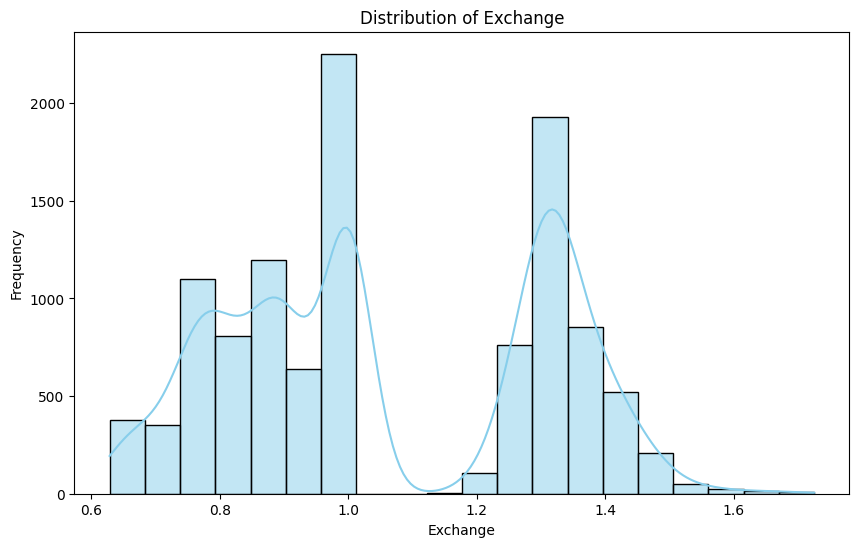

In [13]:
plt.figure(figsize=(10, 6))

sns.histplot(exchangerate['Exchange'].dropna(), kde=True, bins=20, color='skyblue')

plt.title('Distribution of Exchange')

plt.xlabel('Exchange')

plt.ylabel('Frequency')

plt.show()

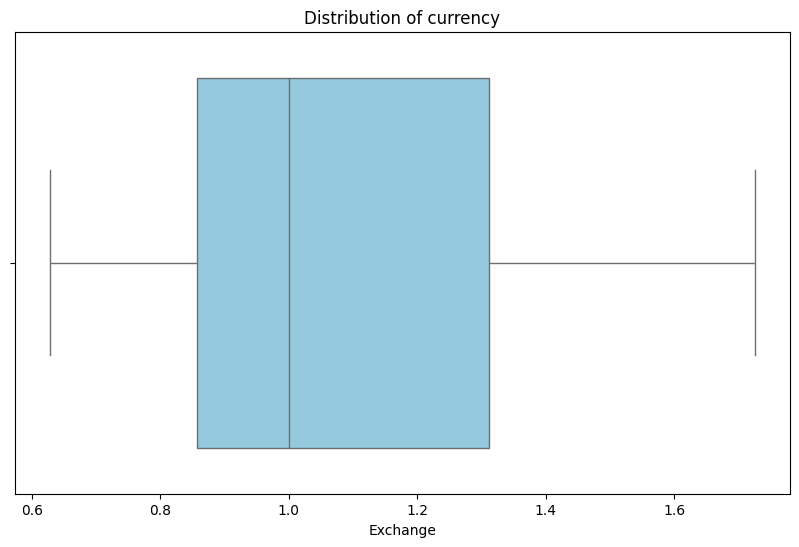

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exchange', data=exchangerate, color='skyblue')

# Set the title and labels
plt.title('Distribution of currency')
plt.xlabel('Exchange')

# Show the plot
plt.show()

In [11]:
#connecting with database
import mysql.connector
mydb = mysql.connector.connect(
 host="localhost",
 user="root",
 password="Nrnaidu@1",


)


print(mydb)
mycursor = mydb.cursor(buffered=True)

In [12]:
mycursor.execute("use project2")

In [13]:
mycursor.execute("create table exchangerate (Date varchar(400), Currency varchar(400), Exchange float)")

In [14]:
data_exchangerate=exchangerate.values.tolist()
insert_query = '''
INSERT INTO exchangerate (Date, Currency, Exchange)
VALUES (%s, %s, %s)
'''
for row in data_exchangerate:
    mycursor.execute(insert_query,row)
mydb.commit()